# All Data for I-94 Westbound between Minneapolis-St. Paul, MN

### Begin by importing required libraries and dependencies

In [85]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read in csv

In [86]:
# Read in Metro_Interstate_Traffic_Volume.csv
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv",
                 index_col="date_time",
                 parse_dates=True
                )
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


### Convert the temp column from Kelvin to Fahrenheit

In [87]:
#Convet Kelvin to Fahrenheit
#Run only once, if you see -ve values in temp, refresh df.

def Kelvin_to_Fahrenheit(x):
    return(x - 273.15) * 9/5 + 32

df['temp']=df['temp'].apply(lambda x : Kelvin_to_Fahrenheit(x))
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,4918


### Replace all null values in the holiday column with "NonHoliday"

In [88]:
#Replace Null values to NonHoliday
#Traffic_Volume_df['holiday'] = Traffic_Volume_df['holiday'].replace({'NaN': 'NonHoliday'})
df['holiday'].fillna('NonHoliday',inplace=True)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NonHoliday,59.234,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NonHoliday,61.178,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NonHoliday,61.574,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NonHoliday,62.564,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NonHoliday,64.382,0.0,0.0,75,Clouds,broken clouds,4918


### Set limits for necessary columns to exclude outliers

In [97]:
df = df[df['temp'] >= -50]
df = df[df['rain_1h'] <= 407]

## Divide the cleaned dataframe by the breakpoints in data 

In [98]:
df_2012_10_02 = df.loc["2012-10-02":"2013-10-27"]

df_2013_11_06 = df.loc["2013-11-06":"2014-08-08"]

df_2015_06_11 = df.loc["2015-06-11":"2018-09-30"]

## Breakdown the dataframe by the date_time, traffic_volume, and the variable column

In [99]:
traffic_volume_df1 = df_2012_10_02[["traffic_volume"]]

holiday_df1 = df_2012_10_02[["holiday", "traffic_volume"]]
holiday_df1 = holiday_df1.reset_index()
holiday_df1 = holiday_df1.set_index(['holiday'])
holiday_df1 = holiday_df1.drop(['NonHoliday'])
holiday_df1 = holiday_df1.reset_index()
holiday_df1 = holiday_df1.set_index(['date_time'])

non_holiday_df1 = df_2012_10_02[["holiday", 'traffic_volume']]
non_holiday_df1 = non_holiday_df1.loc[non_holiday_df1["holiday"]=="NonHoliday"]

temp_df1 = df_2012_10_02[["temp", "traffic_volume"]]

rain_1h_df1 = df_2012_10_02[["rain_1h", "traffic_volume"]]

snow_1h_df1 = df_2012_10_02[["snow_1h", "traffic_volume"]]

clouds_all_df1 = df_2012_10_02[["clouds_all", "traffic_volume"]]

weather_main_df1 = df_2012_10_02[["weather_main", "traffic_volume"]]

weather_description_df1 = df_2012_10_02[["weather_description", "traffic_volume"]]

In [100]:
traffic_volume_df2 = df_2013_11_06[["traffic_volume"]]

holiday_df2 = df_2013_11_06[["holiday", "traffic_volume"]]
holiday_df2 = holiday_df2.reset_index()
holiday_df2 = holiday_df2.set_index(['holiday'])
holiday_df2 = holiday_df2.drop(['NonHoliday'])
holiday_df2 = holiday_df2.reset_index()
holiday_df2 = holiday_df2.set_index(['date_time'])

non_holiday_df2 = df_2013_11_06[["holiday", 'traffic_volume']]
non_holiday_df2 = non_holiday_df2.loc[non_holiday_df2["holiday"]=="NonHoliday"]

temp_df2 = df_2013_11_06[["temp", "traffic_volume"]]

rain_1h_df2 = df_2013_11_06[["rain_1h", "traffic_volume"]]

snow_1h_df2 = df_2013_11_06[["snow_1h", "traffic_volume"]]

clouds_all_df2 = df_2013_11_06[["clouds_all", "traffic_volume"]]

weather_main_df2 = df_2013_11_06[["weather_main", "traffic_volume"]]

weather_description_df2 = df_2013_11_06[["weather_description", "traffic_volume"]]

In [101]:
traffic_volume_df3 = df_2015_06_11[["traffic_volume"]]

holiday_df3 = df_2015_06_11[["holiday", "traffic_volume"]]
holiday_df3 = holiday_df3.reset_index()
holiday_df3 = holiday_df3.set_index(['holiday'])
holiday_df3 = holiday_df3.drop(['NonHoliday'])
holiday_df3 = holiday_df3.reset_index()
holiday_df3 = holiday_df3.set_index(['date_time'])

non_holiday_df3 = df_2015_06_11[["holiday", 'traffic_volume']]
non_holiday_df3 = non_holiday_df3.loc[non_holiday_df3["holiday"]=="NonHoliday"]

temp_df3 = df_2015_06_11[["temp", "traffic_volume"]]

rain_1h_df3 = df_2015_06_11[["rain_1h", "traffic_volume"]]

snow_1h_df3 = df_2015_06_11[["snow_1h", "traffic_volume"]]

clouds_all_df3 = df_2015_06_11[["clouds_all", "traffic_volume"]]

weather_main_df3 = df_2015_06_11[["weather_main", "traffic_volume"]]

weather_description_df3 = df_2015_06_11[["weather_description", "traffic_volume"]]

### Plot the traffic_volume data frames by different time periods

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

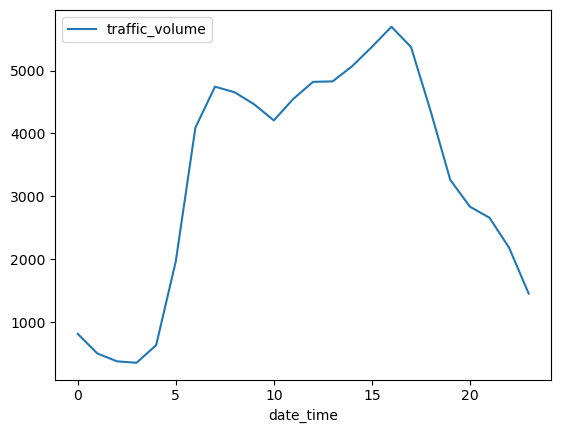

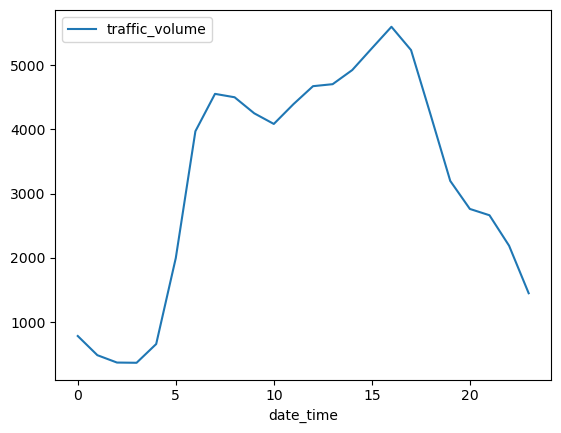

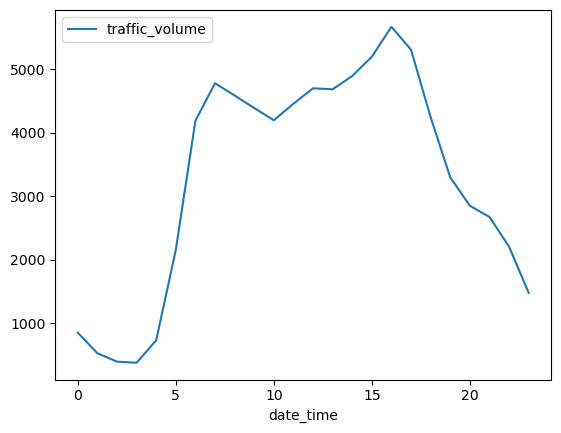

In [102]:
display(traffic_volume_df1.groupby(traffic_volume_df1.index.hour).mean().plot())
display(traffic_volume_df2.groupby(traffic_volume_df2.index.hour).mean().plot())
display(traffic_volume_df3.groupby(traffic_volume_df3.index.hour).mean().plot())

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

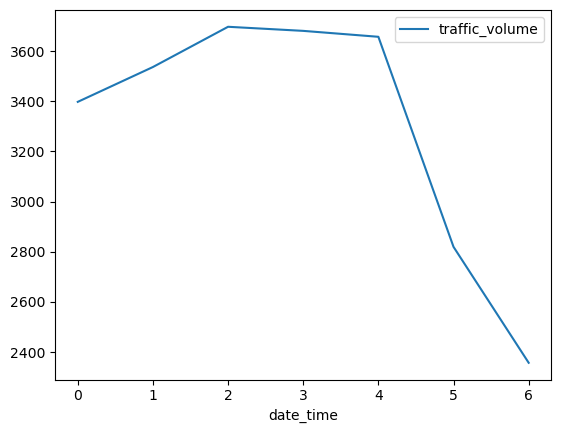

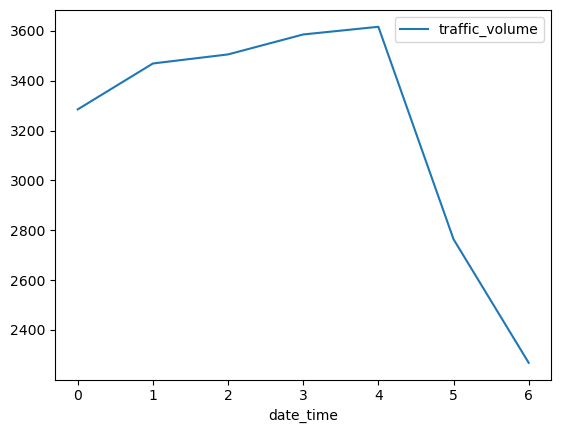

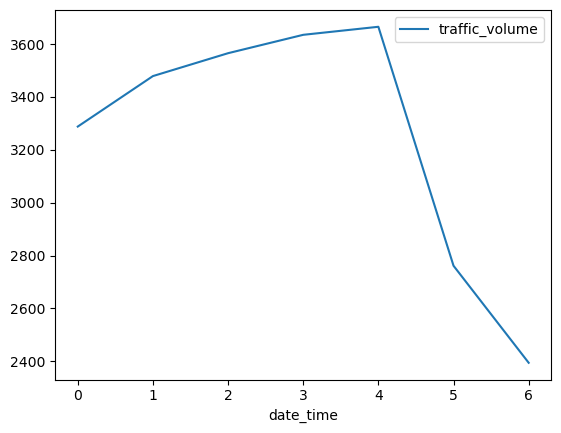

In [103]:
display(traffic_volume_df1.groupby(traffic_volume_df1.index.dayofweek).mean().plot())
display(traffic_volume_df2.groupby(traffic_volume_df2.index.dayofweek).mean().plot())
display(traffic_volume_df3.groupby(traffic_volume_df3.index.dayofweek).mean().plot())

<Axes: xlabel='week'>

<Axes: xlabel='week'>

<Axes: xlabel='week'>

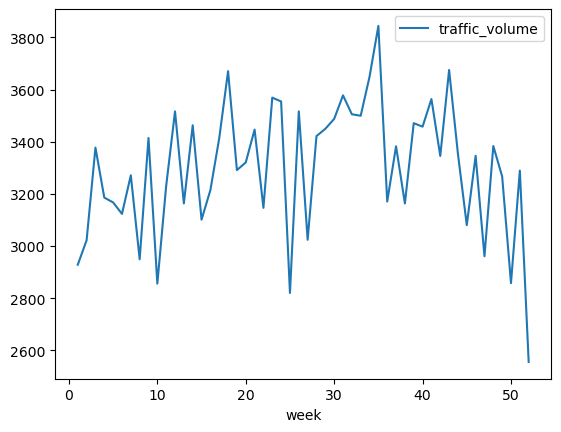

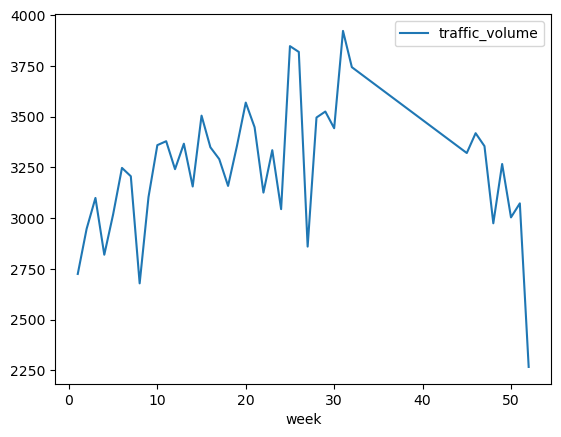

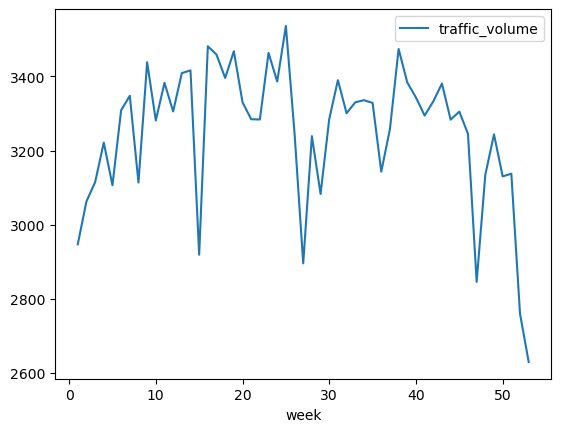

In [104]:
display(traffic_volume_df1.groupby(traffic_volume_df1.index.isocalendar().week).mean().plot())
display(traffic_volume_df2.groupby(traffic_volume_df2.index.isocalendar().week).mean().plot())
display(traffic_volume_df3.groupby(traffic_volume_df3.index.isocalendar().week).mean().plot())

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

<Axes: xlabel='date_time'>

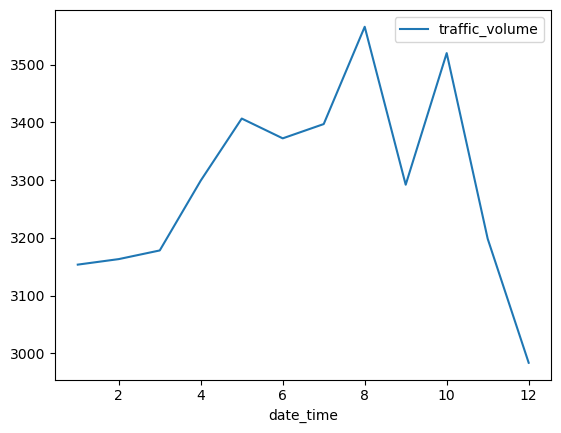

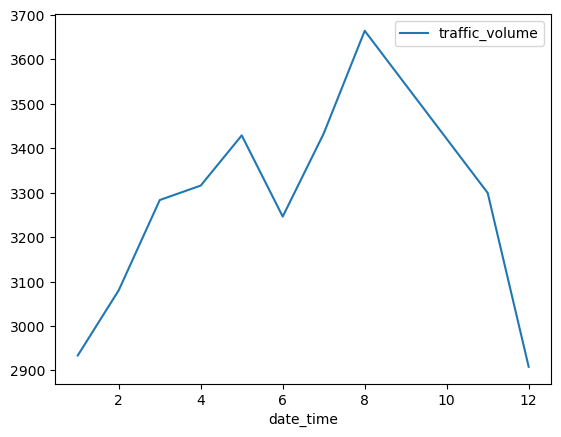

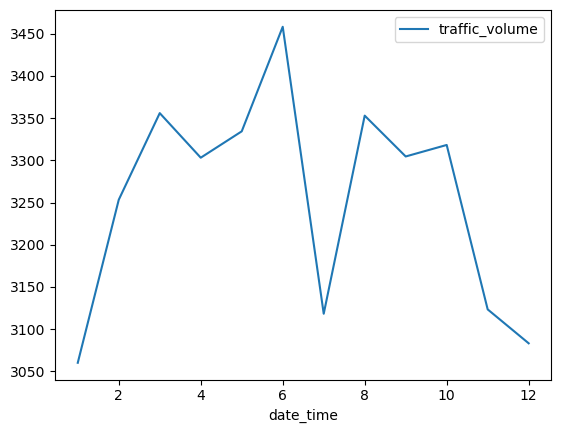

In [105]:
display(traffic_volume_df1.groupby(traffic_volume_df1.index.month).mean().plot())
display(traffic_volume_df2.groupby(traffic_volume_df2.index.month).mean().plot())
display(traffic_volume_df3.groupby(traffic_volume_df3.index.month).mean().plot())

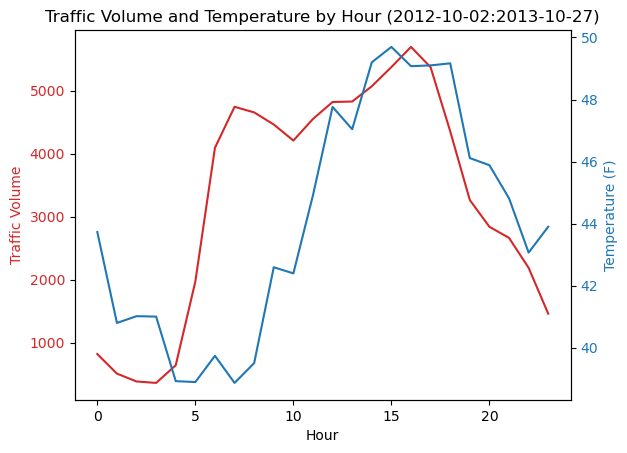

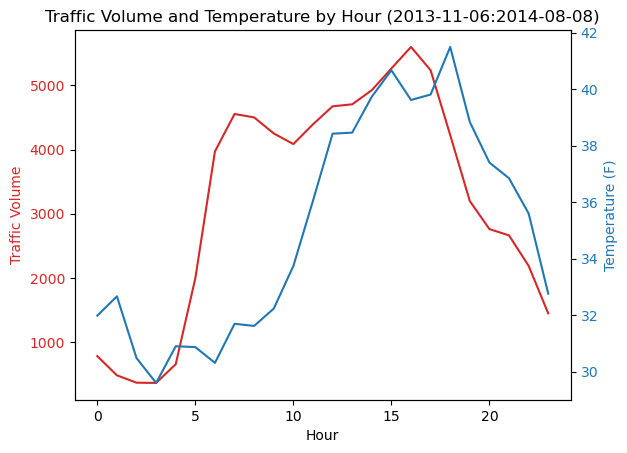

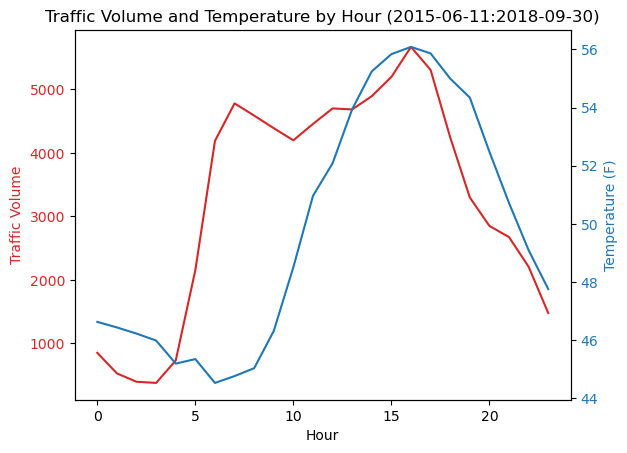

In [114]:
#df1
hourly_temp1 = temp_df1.groupby(temp_df1.index.hour).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(hourly_temp1.index, hourly_temp1['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(hourly_temp1.index, hourly_temp1['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Hour (2012-10-02:2013-10-27)')

plt.show()

#df2
hourly_temp2 = temp_df2.groupby(temp_df2.index.hour).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(hourly_temp2.index, hourly_temp2['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(hourly_temp2.index, hourly_temp2['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Hour (2013-11-06:2014-08-08)')

plt.show()

#df3
hourly_temp3 = temp_df3.groupby(temp_df3.index.hour).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(hourly_temp3.index, hourly_temp3['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(hourly_temp3.index, hourly_temp3['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Hour (2015-06-11:2018-09-30)')

plt.show()

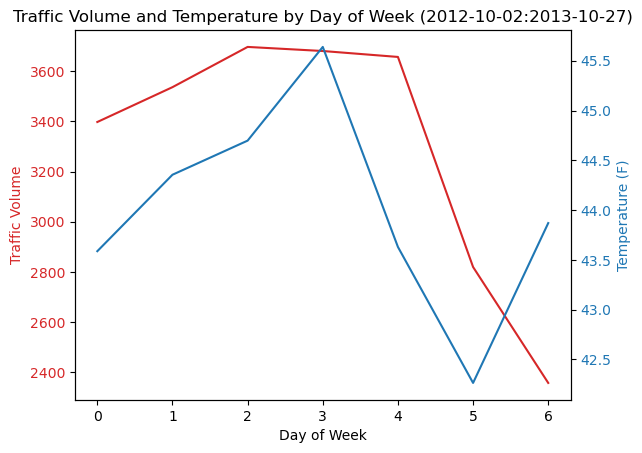

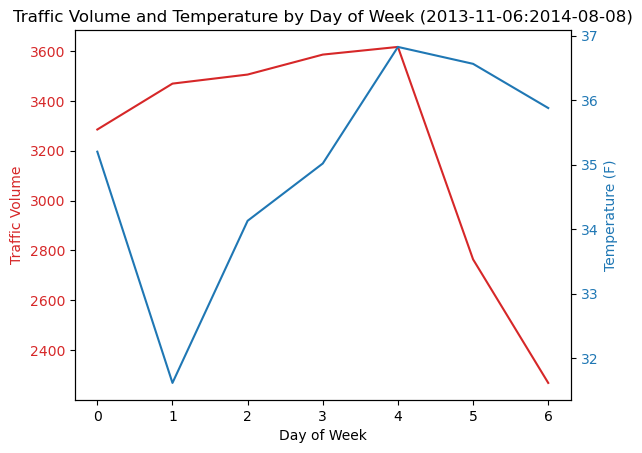

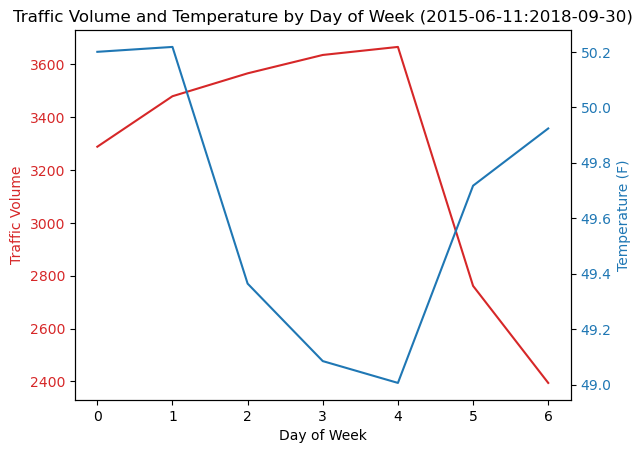

In [116]:
#df1
daily_temp1 = temp_df1.groupby(temp_df1.index.dayofweek).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(daily_temp1.index, daily_temp1['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(daily_temp1.index, daily_temp1['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Day of Week (2012-10-02:2013-10-27)')

plt.show()

#df2
daily_temp2 = temp_df2.groupby(temp_df2.index.dayofweek).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(daily_temp2.index, daily_temp2['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(daily_temp2.index, daily_temp2['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Day of Week (2013-11-06:2014-08-08)')

plt.show()

#df3
daily_temp3 = temp_df3.groupby(temp_df3.index.dayofweek).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(daily_temp3.index, daily_temp3['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(daily_temp3.index, daily_temp3['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Traffic Volume and Temperature by Day of Week (2015-06-11:2018-09-30)')

plt.show()

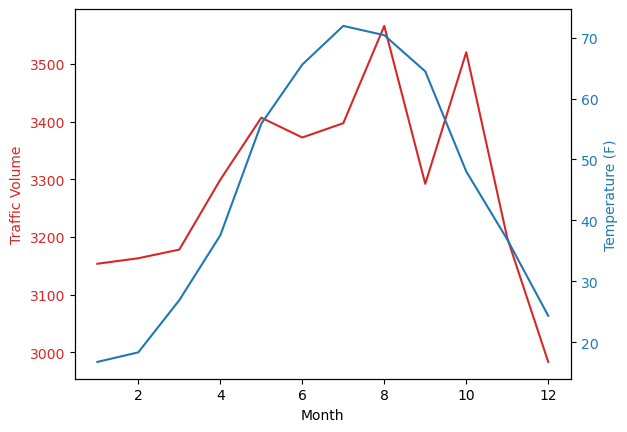

In [108]:
monthly_temp1 = temp_df1.groupby(temp_df1.index.month).mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(monthly_temp1.index, monthly_temp1['traffic_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color=color) 
ax2.plot(monthly_temp1.index, monthly_temp1['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()